In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import dataproject_functions1
df1= dataproject_functions1.load_and_process("../../data/raw/Dataset_irobinson.csv.csv")
df1

,id,turns,victory_status,winner,time,white_rating,black_rating,moves,opening_ply,move_name_and_eco
0,Z1M9z44Z,1,resign,white,10+0,1670,1175,e4,1,King's Pawn(B00)
1,3K5kYPO8,1,resign,black,10+0,1464,1355,g3,1,Hungarian Opening(A00)
2,3NQKJmJ5,1,outoftime,white,5+15,2404,1616,e4,1,King's Pawn(B00)
3,01dkNQ2O,1,outoftime,white,20+10,2438,1666,e4,1,King's Pawn(B00)
4,LAFV9u5Q,1,outoftime,white,20+10,2438,1885,e4,1,King's Pawn(B00)
...,...,...,...,...,...,...,...,...,...,...
20053,5ZjOnwjl,226,draw,draw,10+0,1817,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,3,French Defense: Knight Variation(C00)
20054,vQq60Hur,255,draw,draw,7+2,1585,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,3,French Defense: Queen's Knight(C00)
20055,cZiGllu7,259,draw,draw,15+5,1441,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,5,Slav Defense #2(D10)
20056,pN0ioHNr,349,outoftime,white,10+0,2194,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,13,Queen's Gambit Declined: Hastings Variation(D30)


In [4]:
#function for step 3 before it was moved to sript

#def load_and_process(path):

#loading data and removing nan values

#    df1=(pd.read_csv("../../data/raw/Dataset_irobinson.csv.csv")
 #        .dropna()
  # )
   # df2= (df1.drop(['created_at','last_move_at','rated','white_id','black_id'],axis=1)
    #    .dropna()
     #   .sort_values(by=['turns'],ascending=True)
      #  .assign(move_name_and_eco= df1['opening_name']+ '('+ df1['opening_eco'] +')')
       # .drop(['opening_eco','opening_name'],axis=1)
        #.rename(columns={'increment_code':'time'})
        #.reset_index(drop=True)
#)
 #   return df2

In [5]:
#breakdown of key information regarding the numerical data
df1.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [6]:
#correlations of numerical data
df1.corr()

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129753,0.160467,0.055999
white_rating,0.129753,1.000000,0.634171,0.277379
black_rating,0.160467,0.634171,1.000000,0.255396
opening_ply,0.055999,0.277379,0.255396,1.000000


<AxesSubplot:>

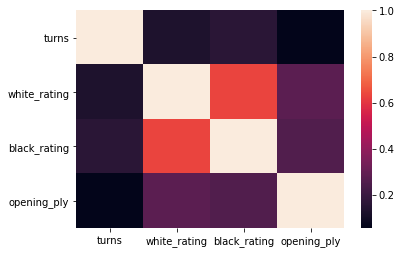

In [50]:
#see if there are any correlations between opening ply and colour
sns.heatmap(df1.corr())

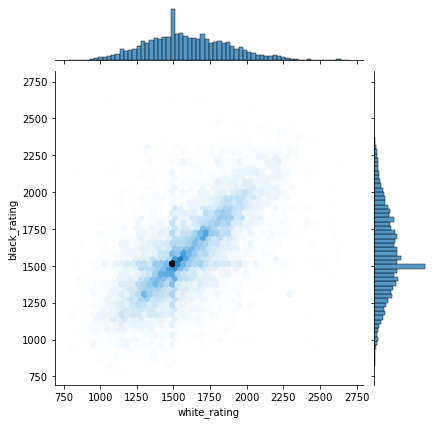

In [55]:
#comparing player ratings
sns.jointplot(x='white_rating',y='black_rating',data=df1,kind='hex')

In [10]:
df_top_ecos=df1['move_name_and_eco'].value_counts().head(25)
df_top_ecos

Van't Kruijs Opening(A00)                             368
Sicilian Defense: Bowdler Attack(B20)                 296
French Defense: Knight Variation(C00)                 271
Scandinavian Defense: Mieses-Kotroc Variation(B01)    259
Queen's Pawn Game: Mason Attack(D00)                  232
Scandinavian Defense(B01)                             223
Horwitz Defense(A40)                                  209
Philidor Defense #3(C41)                              198
Philidor Defense #2(C41)                              193
Indian Game(A45)                                      181
Italian Game: Anti-Fried Liver Defense(C55)           180
Sicilian Defense(B50)                                 171
Owen Defense(B00)                                     168
King's Pawn Game: Wayward Queen Attack(C20)           164
Sicilian Defense: Old Sicilian(B30)                   159
King's Pawn Game: Leonardis Variation(C20)            154
Sicilian Defense(B20)                                 151
Scotch Game(C4

In [73]:
#sort most popular opening ECOs by colour

df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
                     .reset_index()
                     )
                    
df_high_frequencies

ValueError: cannot insert move_name_and_eco, already exists

In [84]:
#sort most popular opening ECOs by colour

df_high_frequencies=(df1.groupby('winner')['move_name_and_eco']
                     .value_counts()
                     .sort_values(ascending=False)
                     .head(25)
                     .to_frame()
                     
                
                     )
                    
df_high_frequencies.reset_index(inplace=True)

ValueError: cannot insert move_name_and_eco, already exists

ValueError: cannot insert move_name_and_eco, already exists

In [69]:
sns.countplot(y='move_name_and_eco',data=df_high_frequencies.head(25),hue='winner')

ValueError: Could not interpret input 'winner'

Text(0, 0.5, 'Opening Move (ECO)')

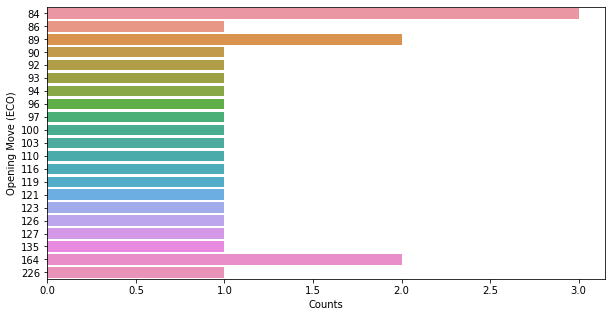

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(y='move_name_and_eco',data=df_high_frequencies)
plt.xlabel('Counts')
plt.ylabel('Opening Move (ECO)')